<a href="https://colab.research.google.com/github/crdguez/mat4ac/blob/master/notebooks/12-Radicales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Ejecutar para que funcione el parse_latex en google colab

!pip install sympy==1.3 antlr4-python3-runtime==4.7.1

Processing /home/hp/.cache/pip/wheels/6c/59/86/478e3c0f298368c119095cc5985dedac57c0e35a85c737f823/sympy-1.3-cp36-none-any.whl
  Attempting uninstall: sympy
    Found existing installation: sympy 1.4
    Uninstalling sympy-1.4:
      Successfully uninstalled sympy-1.4
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

latex2sympy3 0.1.1 requires antlr4-python3-runtime==4.5.3, but you'll have antlr4-python3-runtime 4.7.1 which is incompatible.
You should consider upgrading via the '/home/hp/Mis_aplicaciones/anaconda3/bin/python -m pip install --upgrade pip' command.


In [1]:
from sympy import init_session
from sympy.parsing.latex import parse_latex
from IPython.display import Markdown as md
from IPython.display import display
import numpy as np

init_session()

a, b, c, d = symbols('a b c d', real = True)

IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [2]:
def mostrar_ejercicio(ejercicio,solucion,tipo=0) :
    #tipo=0 se pasa el ejercicio y la solucion en formato latex
    if tipo == 0 :
        display(md("#### Ejercicio:"))
        display(md(r"{} $\to$ {}".format(ejercicio, solucion)))
        print("enunciado_latex: " + ejercicio)
        print("solucion_latex: " + solucion)
        return ejercicio, solucion
    elif tipo == 1:
        display(md("#### Ejercicio:"))
        display(md(r"{} $\to$ {}".format(ejercicio, solucion)))
        print("enunciado_latex: " + ejercicio)
        print("solucion_latex: " + solucion)
        return ejercicio, solucion

        
    

In [3]:
# Teorema del resto

ejercicios=[
            # cociente, x-a, resto, el dividendo (polinomio del enunciado) lo calcula la celda
            [-2*x**2+3*x-6,-1,0]
           ]

display(md("## Teorema del resto:"))

for e in ejercicios :
    polinomio = expand(e[0]*S("x-"+str(e[1]))+e[2]) # propiedad fundamental de la división
    enunciado_latex = r"""Utilizando el teorema del resto para el polinomio $P (x) ={}$ resuelve: \\ 
    Valor numérico para $x = {}$ \\ 
    ¿Es divisible P (x) por ${}$? 
    Justifica tu respuesta""".format(latex(polinomio),e[1],S("x-"+latex(e[1])))

    solucion_latex = r"Si dividimos $P(x)={}$ entre ${}$ ".format(latex(polinomio),S(r"x-"+str(e[1])))+r"el resto da "+latex(e[2])
    solucion_latex += r". \\ Por el teorema del resto, $P({})={}$".format(e[1], polinomio.subs(x,e[1]))
    solucion_latex += r". \\ Aplicando la propiedad fundamental de la división obtenemos que $P(x)={}=\left({}\right)\cdot\left({}\right)+{} \to $ ".format(latex(polinomio), latex(S(r"x-"+str(e[1]))), latex(e[0]), latex(e[2]))
    solucion_latex += "Sí es divisible." if e[2]==0 else "No es divisible,"
    #print(enunciado_latex)

    mostrar_ejercicio(enunciado_latex, solucion_latex)  


## Teorema del resto:

#### Ejercicio:

Utilizando el teorema del resto para el polinomio $P (x) =- 2 x^{3} + x^{2} - 3 x - 6$ resuelve: \\ 
    Valor numérico para $x = -1$ \\ 
    ¿Es divisible P (x) por $x + 1$? 
    Justifica tu respuesta $\to$ Si dividimos $P(x)=- 2 x^{3} + x^{2} - 3 x - 6$ entre $x + 1$ el resto da 0. \\ Por el teorema del resto, $P(-1)=0$. \\ Aplicando la propiedad fundamental de la división obtenemos que $P(x)=- 2 x^{3} + x^{2} - 3 x - 6=\left(x + 1\right)\cdot\left(- 2 x^{2} + 3 x - 6\right)+0 \to $ Sí es divisible.

enunciado_latex: Utilizando el teorema del resto para el polinomio $P (x) =- 2 x^{3} + x^{2} - 3 x - 6$ resuelve: \\ 
    Valor numérico para $x = -1$ \\ 
    ¿Es divisible P (x) por $x + 1$? 
    Justifica tu respuesta
solucion_latex: Si dividimos $P(x)=- 2 x^{3} + x^{2} - 3 x - 6$ entre $x + 1$ el resto da 0. \\ Por el teorema del resto, $P(-1)=0$. \\ Aplicando la propiedad fundamental de la división obtenemos que $P(x)=- 2 x^{3} + x^{2} - 3 x - 6=\left(x + 1\right)\cdot\left(- 2 x^{2} + 3 x - 6\right)+0 \to $ Sí es divisible.


In [5]:
enunciados=[[x*(x-1)*(2*x-3),x**2*(x-1)]]

ejercicios =[r"\frac{{{}}}{{{}}}".format(latex(expand(i[0])),latex(expand(i[0]))) for i in enunciados] 

In [4]:
# Simplificar fracciones algebraicas

# ejercicios en lates
# ejercicios=[
#             r'\frac{2x^3-5x^2+3x}{2x^2+x-6}',

#            ]

# ejercicios en numerador y denominador en factores. La celda obtiene la fracción del enunciado

enunciados=[[x*(x-1)*(2*x-3),x**2*(x-1)],
            [x*(x - 1)*(2*x - 3),(x + 2)*(2*x - 3)],
            [2*x*(x-1)**3,6*x*(x-1)**2]
           ]

ejercicios =[r"\frac{{{}}}{{{}}}".format(latex(expand(i[0])),latex(expand(i[1]))) for i in enunciados] 

display(md("## Simplifica la siguiente fracción algebraica:"))

[mostrar_ejercicio("$"+e+"$", 
                   "$"+e+r"=\frac{{{}}}{{{}}}=".format(latex(factor(parse_latex(e).as_numer_denom()[0])),latex(factor(parse_latex(e).as_numer_denom()[1])))+latex(cancel(parse_latex(e)))+"$") 
for e in ejercicios]    



#[mostrar_ejercicio(e, latex(S(parse_latex(r"\frac{"+latex(factorint(simplify(parse_latex(e)).as_numer_denom()[0] , visual=True))+r"}{" +latex(factorint(simplify(parse_latex(e)).as_numer_denom()[1], visual=True))+"}"), evaluate=False))) for e in ejercicios]    




## Simplifica la siguiente fracción algebraica:

ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1


#### Ejercicio:

$\frac{2 x^{3} - 5 x^{2} + 3 x}{x^{3} - x^{2}}$ $\to$ $\frac{2 x^{3} - 5 x^{2} + 3 x}{x^{3} - x^{2}}=\frac{x \left(x - 1\right) \left(2 x - 3\right)}{x^{2} \left(x - 1\right)}=\frac{2 x - 3}{x}$

enunciado_latex: $\frac{2 x^{3} - 5 x^{2} + 3 x}{x^{3} - x^{2}}$
solucion_latex: $\frac{2 x^{3} - 5 x^{2} + 3 x}{x^{3} - x^{2}}=\frac{x \left(x - 1\right) \left(2 x - 3\right)}{x^{2} \left(x - 1\right)}=\frac{2 x - 3}{x}$
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1


#### Ejercicio:

$\frac{2 x^{3} - 5 x^{2} + 3 x}{2 x^{2} + x - 6}$ $\to$ $\frac{2 x^{3} - 5 x^{2} + 3 x}{2 x^{2} + x - 6}=\frac{x \left(x - 1\right) \left(2 x - 3\right)}{\left(x + 2\right) \left(2 x - 3\right)}=\frac{x^{2} - x}{x + 2}$

enunciado_latex: $\frac{2 x^{3} - 5 x^{2} + 3 x}{2 x^{2} + x - 6}$
solucion_latex: $\frac{2 x^{3} - 5 x^{2} + 3 x}{2 x^{2} + x - 6}=\frac{x \left(x - 1\right) \left(2 x - 3\right)}{\left(x + 2\right) \left(2 x - 3\right)}=\frac{x^{2} - x}{x + 2}$
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1


#### Ejercicio:

$\frac{2 x^{4} - 6 x^{3} + 6 x^{2} - 2 x}{6 x^{3} - 12 x^{2} + 6 x}$ $\to$ $\frac{2 x^{4} - 6 x^{3} + 6 x^{2} - 2 x}{6 x^{3} - 12 x^{2} + 6 x}=\frac{2 x \left(x - 1\right)^{3}}{6 x \left(x - 1\right)^{2}}=\frac{x}{3} - \frac{1}{3}$

enunciado_latex: $\frac{2 x^{4} - 6 x^{3} + 6 x^{2} - 2 x}{6 x^{3} - 12 x^{2} + 6 x}$
solucion_latex: $\frac{2 x^{4} - 6 x^{3} + 6 x^{2} - 2 x}{6 x^{3} - 12 x^{2} + 6 x}=\frac{2 x \left(x - 1\right)^{3}}{6 x \left(x - 1\right)^{2}}=\frac{x}{3} - \frac{1}{3}$


[('$\\frac{2 x^{3} - 5 x^{2} + 3 x}{x^{3} - x^{2}}$',
  '$\\frac{2 x^{3} - 5 x^{2} + 3 x}{x^{3} - x^{2}}=\\frac{x \\left(x - 1\\right) \\left(2 x - 3\\right)}{x^{2} \\left(x - 1\\right)}=\\frac{2 x - 3}{x}$'),
 ('$\\frac{2 x^{3} - 5 x^{2} + 3 x}{2 x^{2} + x - 6}$',
  '$\\frac{2 x^{3} - 5 x^{2} + 3 x}{2 x^{2} + x - 6}=\\frac{x \\left(x - 1\\right) \\left(2 x - 3\\right)}{\\left(x + 2\\right) \\left(2 x - 3\\right)}=\\frac{x^{2} - x}{x + 2}$'),
 ('$\\frac{2 x^{4} - 6 x^{3} + 6 x^{2} - 2 x}{6 x^{3} - 12 x^{2} + 6 x}$',
  '$\\frac{2 x^{4} - 6 x^{3} + 6 x^{2} - 2 x}{6 x^{3} - 12 x^{2} + 6 x}=\\frac{2 x \\left(x - 1\\right)^{3}}{6 x \\left(x - 1\\right)^{2}}=\\frac{x}{3} - \\frac{1}{3}$')]

In [5]:
ejercicios=[r'\frac{2x^3-5x^2+3x}{2x^2+x-6}']

[print([factor(parse_latex(e).as_numer_denom()[0]),factor(parse_latex(e).as_numer_denom()[1])]) for e in ejercicios]




ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
[x*(x - 1)*(2*x - 3), (x + 2)*(2*x - 3)]


[None]

In [6]:
# Halla el valor de \emph{k} para que la siguiente división sea exacta:

k = symbols('k')

ejercicios = [[r'3x^2+kx-2',-2],
            ]

display(md("## Halla el valor de k para que la siguiente división sea exacta:"))

[mostrar_ejercicio(r"$\left( {} \right): \left({}\right)$ ".format(e[0],latex(x-e[1])), 
                   r"${}=0 \to k = {} $".format(latex(parse_latex(e[0]).subs(x,e[1])),solve(parse_latex(e[0]).subs(x,e[1]),k)[0])) 
for e in ejercicios]


## Halla el valor de k para que la siguiente división sea exacta:

ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1


#### Ejercicio:

$\left( 3x^2+kx-2 \right): \left(x + 2\right)$  $\to$ $10 - 2 k=0 \to k = 5 $

enunciado_latex: $\left( 3x^2+kx-2 \right): \left(x + 2\right)$ 
solucion_latex: $10 - 2 k=0 \to k = 5 $


[('$\\left( 3x^2+kx-2 \\right): \\left(x + 2\\right)$ ',
  '$10 - 2 k=0 \\to k = 5 $')]

In [7]:
# Resuelve las siguientes ecuaciones:

ejercicios = [
              r'2x^4-6x^3+6x^2-2x=0',
              r'6x^3-12x^2+6x=0',
            ]

display(md("## Resuelve las siguientes ecuaciones:"))

[mostrar_ejercicio(r"${}$ ".format(e), 
                   r"${} \to {} \to x=".format(e,latex(factor(parse_latex(e))))
                   +r", x=".join(map(latex,solve(parse_latex(e))))+r"$"
                  )
for e in ejercicios]


## Resuelve las siguientes ecuaciones:

ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1


#### Ejercicio:

$2x^4-6x^3+6x^2-2x=0$  $\to$ $2x^4-6x^3+6x^2-2x=0 \to 2 x \left(x - 1\right)^{3} = 0 \to x=0, x=1$

enunciado_latex: $2x^4-6x^3+6x^2-2x=0$ 
solucion_latex: $2x^4-6x^3+6x^2-2x=0 \to 2 x \left(x - 1\right)^{3} = 0 \to x=0, x=1$
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1


#### Ejercicio:

$6x^3-12x^2+6x=0$  $\to$ $6x^3-12x^2+6x=0 \to 6 x \left(x - 1\right)^{2} = 0 \to x=0, x=1$

enunciado_latex: $6x^3-12x^2+6x=0$ 
solucion_latex: $6x^3-12x^2+6x=0 \to 6 x \left(x - 1\right)^{2} = 0 \to x=0, x=1$


[('$2x^4-6x^3+6x^2-2x=0$ ',
  '$2x^4-6x^3+6x^2-2x=0 \\to 2 x \\left(x - 1\\right)^{3} = 0 \\to x=0, x=1$'),
 ('$6x^3-12x^2+6x=0$ ',
  '$6x^3-12x^2+6x=0 \\to 6 x \\left(x - 1\\right)^{2} = 0 \\to x=0, x=1$')]

In [7]:
# Resuelve las siguientes ecuaciones:

ejercicios = [
              r'2x^4-6x^3+6x^2-2x=0',
              r'6x^3-12x^2+6x=0',
            ]

display(md("## Resuelve las siguientes ecuaciones:"))

[mostrar_ejercicio(r"${}$ ".format(e), 
                   r"${} \to {} \to x=".format(e,latex(factor(parse_latex(e))))
                   +r", x=".join(map(latex,solve(parse_latex(e))))+r"$"
                  )
for e in ejercicios]


## Resuelve las siguientes ecuaciones:

ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1


#### Ejercicio:

$2x^4-6x^3+6x^2-2x=0$  $\to$ $2x^4-6x^3+6x^2-2x=0 \to 2 x \left(x - 1\right)^{3} = 0 \to x=0, x=1$

enunciado_latex: $2x^4-6x^3+6x^2-2x=0$ 
solucion_latex: $2x^4-6x^3+6x^2-2x=0 \to 2 x \left(x - 1\right)^{3} = 0 \to x=0, x=1$
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1


#### Ejercicio:

$6x^3-12x^2+6x=0$  $\to$ $6x^3-12x^2+6x=0 \to 6 x \left(x - 1\right)^{2} = 0 \to x=0, x=1$

enunciado_latex: $6x^3-12x^2+6x=0$ 
solucion_latex: $6x^3-12x^2+6x=0 \to 6 x \left(x - 1\right)^{2} = 0 \to x=0, x=1$


[('$2x^4-6x^3+6x^2-2x=0$ ',
  '$2x^4-6x^3+6x^2-2x=0 \\to 2 x \\left(x - 1\\right)^{3} = 0 \\to x=0, x=1$'),
 ('$6x^3-12x^2+6x=0$ ',
  '$6x^3-12x^2+6x=0 \\to 6 x \\left(x - 1\\right)^{2} = 0 \\to x=0, x=1$')]

## Resuelve las siguientes ecuaciones:

ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8

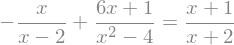

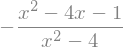

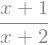

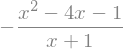

#### Ejercicio:

$\frac{6x+1}{x^2-4}-\frac{x}{x-2}=\frac{x+1}{x+2}$  $\to$ $\frac{6x+1}{x^2-4}-\frac{x}{x-2}=\frac{x+1}{x+2} \to \frac{x + 1}{x + 2} = \frac{- x^{2} + 4 x + 1}{x^{2} - 4} $

enunciado_latex: $\frac{6x+1}{x^2-4}-\frac{x}{x-2}=\frac{x+1}{x+2}$ 
solucion_latex: $\frac{6x+1}{x^2-4}-\frac{x}{x-2}=\frac{x+1}{x+2} \to \frac{x + 1}{x + 2} = \frac{- x^{2} + 4 x + 1}{x^{2} - 4} $
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1


In [29]:
# Resuelve las siguientes ecuaciones:

ejercicios = [#r'\frac{2x}{x+1}-\frac{1}{x}=\frac{5}{6}',
              r'\frac{6x+1}{x^2-4}-\frac{x}{x-2}=\frac{x+1}{x+2}',
             ]

display(md("## Resuelve las siguientes ecuaciones:"))

#[mostrar_ejercicio(r"${}$ ".format(e), 
#                   r"${} \to {} ".format(e,latex(simplify(parse_latex(e))))
#                   #+r"\to {} ={}".format(latex(simplify(parse_latex(e)).args[0]),latex(simplify(parse_latex(e)).args[1]))
#                   +r"\to {} ={}".format(latex(factor(parse_latex(e)).args[0]),latex(factor(parse_latex(e)).args[1]))
#                   +r"\to {} ={}".format(latex(nsimplify(parse_latex(e)).args[0]),latex(cancel(parse_latex(e)).args[1]))
#
#                   +r"\to {}={}".format(latex(simplify(parse_latex(e)).args[0].as_numer_denom()[0]*UnevaluatedExpr(simplify(parse_latex(e)).args[1].as_numer_denom()[1])),latex(simplify(parse_latex(e)).args[0].as_numer_denom()[1]*(simplify(parse_latex(e)).args[1].as_numer_denom()[0])))
#                   #+r"\to {}={}".format(latex(cancel(parse_latex(e)).args[0].as_numer_denom()[0]*cancel(simplify(parse_latex(e)).args[1].as_numer_denom()[1])),latex(cancel(parse_latex(e)).args[0].as_numer_denom()[1]*(cancel(parse_latex(e)).args[1].as_numer_denom()[0])))
#
#                   +r"\to {}=0".format(latex(simplify(parse_latex(e).args[0].as_numer_denom()[0]*(parse_latex(e)).args[1].as_numer_denom()[1]-parse_latex(e).args[0].as_numer_denom()[1]*parse_latex(e).args[1].as_numer_denom()[0])))
#                   +r"\to x="
#                   +r", x=".join(map(latex,solve(parse_latex(e))))+r"$"
#                  )
#for e in ejercicios]

for e in ejercicios :
    enunciado = r"${}$ ".format(e)
    solucion = r"${} \to {} ".format(e,latex(simplify(parse_latex(e))))
    display(parse_latex(e), cancel(parse_latex(e).args[0]),cancel(parse_latex(e).args[1]),
            cancel(cancel(parse_latex(e).args[0]).as_numer_denom()[0]/cancel(parse_latex(e).args[1]).as_numer_denom()[0]),
            cancel(cancel(parse_latex(e).args[0]).as_numer_denom()[1]/cancel(parse_latex(e).args[1]).as_numer_denom()[1])
           )
    solucion += r"$"
    mostrar_ejercicio(enunciado,solucion)

e= ejercicios[0]
simplify(parse_latex(e)).args[0].as_numer_denom()[0]*UnevaluatedExpr(simplify(parse_latex(e)).args[1].as_numer_denom()[1])
simplify(parse_latex(e)).args[0].as_numer_denom()[1]*(simplify(parse_latex(e)).args[1].as_numer_denom()[0])


In [11]:
# Resuelve las siguientes ecuaciones:

ejercicios = [r'\frac{2x}{x+1}-\frac{1}{x}=\frac{5}{6}',
              r'\frac{6x+1}{x^2-4}-\frac{x}{x-2}=\frac{x+1}{x+2}',
              r'2x^4-6x^3+6x^2-2x=0',
              r'6x^3-12x^2+6x=0',
              r'\sqrt{x+1}+5=x',
              r'\sqrt{3x-2}+\sqrt{x-1}=3'
            ]

display(md("## Resuelve las siguientes ecuaciones:"))

[mostrar_ejercicio(r"${}$ ".format(e), 
                   r"$x="+r", x=".join(map(latex,solve(parse_latex(e))))+r"$"
                  )
for e in ejercicios]


## Resuelve las siguientes ecuaciones:

#### Ejercicio:

$\frac{2x}{x+1}-\frac{1}{x}=\frac{5}{6}$  $\to$ $x=- \frac{3}{7}, x=2$

enunciado_latex: $\frac{2x}{x+1}-\frac{1}{x}=\frac{5}{6}$ 
solucion_latex: $x=- \frac{3}{7}, x=2$


#### Ejercicio:

$\frac{6x+1}{x^2-4}-\frac{x}{x-2}=\frac{x+1}{x+2}$  $\to$ $x=- \frac{1}{2}, x=3$

enunciado_latex: $\frac{6x+1}{x^2-4}-\frac{x}{x-2}=\frac{x+1}{x+2}$ 
solucion_latex: $x=- \frac{1}{2}, x=3$


#### Ejercicio:

$2x^4-6x^3+6x^2-2x=0$  $\to$ $x=0, x=1$

enunciado_latex: $2x^4-6x^3+6x^2-2x=0$ 
solucion_latex: $x=0, x=1$


#### Ejercicio:

$6x^3-12x^2+6x=0$  $\to$ $x=0, x=1$

enunciado_latex: $6x^3-12x^2+6x=0$ 
solucion_latex: $x=0, x=1$


#### Ejercicio:

$\sqrt{x+1}+5=x$  $\to$ $x=8$

enunciado_latex: $\sqrt{x+1}+5=x$ 
solucion_latex: $x=8$


#### Ejercicio:

$\sqrt{3x-2}+\sqrt{x-1}=3$  $\to$ $x=2$

enunciado_latex: $\sqrt{3x-2}+\sqrt{x-1}=3$ 
solucion_latex: $x=2$


[('$\\frac{2x}{x+1}-\\frac{1}{x}=\\frac{5}{6}$ ', '$x=- \\frac{3}{7}, x=2$'),
 ('$\\frac{6x+1}{x^2-4}-\\frac{x}{x-2}=\\frac{x+1}{x+2}$ ',
  '$x=- \\frac{1}{2}, x=3$'),
 ('$2x^4-6x^3+6x^2-2x=0$ ', '$x=0, x=1$'),
 ('$6x^3-12x^2+6x=0$ ', '$x=0, x=1$'),
 ('$\\sqrt{x+1}+5=x$ ', '$x=8$'),
 ('$\\sqrt{3x-2}+\\sqrt{x-1}=3$ ', '$x=2$')]

In [12]:
# Resuelve las siguientes ecuaciones:

ejercicios = [[r'2\log x- \log{\left(3x-5\right)}=\log{5x} - 1', Eq(2*log(x,10)-log(3*x-5,10),log(5*x,10)-1)],
              [r'\log {\left(x-1\right)}+ \log{2}=\log{\left(x^2+3\right)} - \log x',Eq(log(x-1,10)+log(2,10),log(x**2+3,10)-log(x,10))],
              [r'\left(x^2-5x+5\right)\log 5 + \log{20}=\log 4',Eq((x**2-5*x+5)*log(5,10)+log(20,10),log(4,10))]
            ]

display(md("## Resuelve las siguientes ecuaciones:"))

[mostrar_ejercicio(r"${}$ ".format(e[0]), 
                   r"$x="+r", x=".join(map(latex,solve(e[1])))+r"$"
                  )
for e in ejercicios]




## Resuelve las siguientes ecuaciones:

#### Ejercicio:

$2\log x- \log{\left(3x-5\right)}=\log{5x} - 1$  $\to$ $x=5$

enunciado_latex: $2\log x- \log{\left(3x-5\right)}=\log{5x} - 1$ 
solucion_latex: $x=5$


#### Ejercicio:

$\log {\left(x-1\right)}+ \log{2}=\log{\left(x^2+3\right)} - \log x$  $\to$ $x=3$

enunciado_latex: $\log {\left(x-1\right)}+ \log{2}=\log{\left(x^2+3\right)} - \log x$ 
solucion_latex: $x=3$


#### Ejercicio:

$\left(x^2-5x+5\right)\log 5 + \log{20}=\log 4$  $\to$ $x=2, x=3$

enunciado_latex: $\left(x^2-5x+5\right)\log 5 + \log{20}=\log 4$ 
solucion_latex: $x=2, x=3$


[('$2\\log x- \\log{\\left(3x-5\\right)}=\\log{5x} - 1$ ', '$x=5$'),
 ('$\\log {\\left(x-1\\right)}+ \\log{2}=\\log{\\left(x^2+3\\right)} - \\log x$ ',
  '$x=3$'),
 ('$\\left(x^2-5x+5\\right)\\log 5 + \\log{20}=\\log 4$ ', '$x=2, x=3$')]